# Assignment 2
By Sushaanth Srinivasan, SSNCE195001113

## 1. Download Dataset

## Mounting Drive to import csv file from Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/MyDrive/IBM Data/"

Churn_Modelling.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. Loading Dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/IBM Data/Churn_Modelling.csv')
print(df.head()) 

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

## 3. Visualizations

### Univariate Analysis

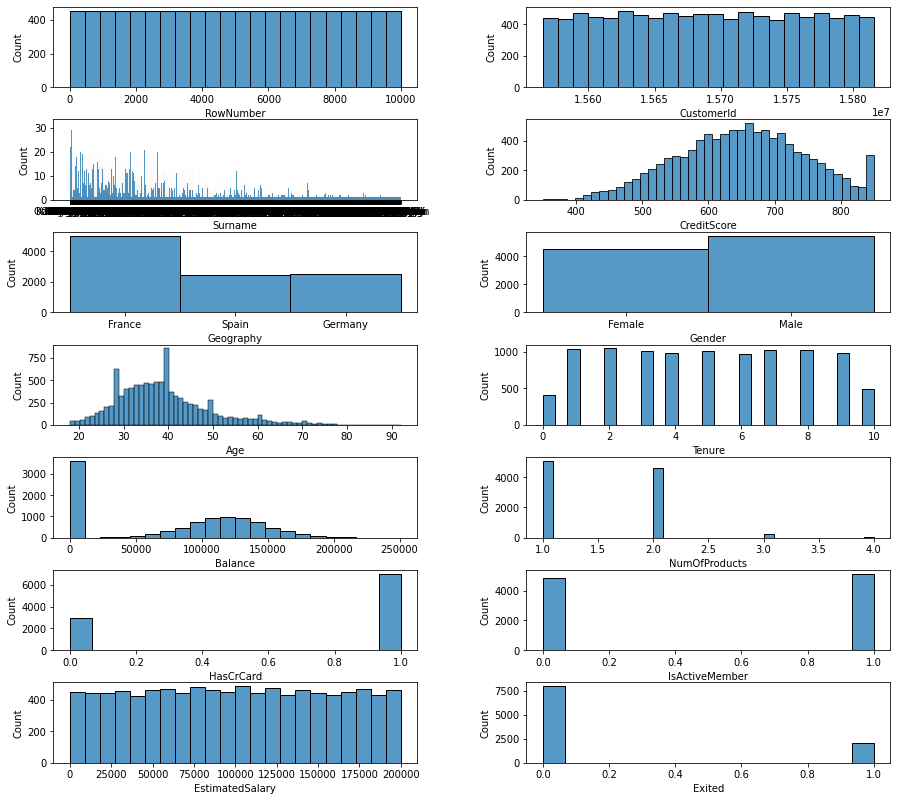

In [5]:
fig, ax = plt.subplots(7, 2, figsize=(15, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4)
for variable, subplot in zip(df.columns, ax.flatten()):
    sns.histplot(df[variable], ax=subplot)

### Bivariate Analysis

<Figure size 576x432 with 0 Axes>

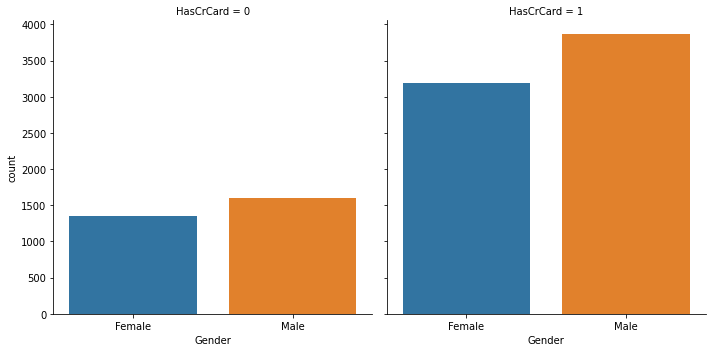

In [6]:
plt.figure(figsize=(8,6))
sns.catplot(x='Gender', col='HasCrCard', kind='count', data=df)

### Multivariate Analysis

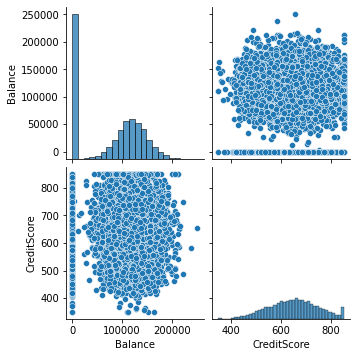

In [7]:
sns.pairplot(data=df[['Geography','Balance','CreditScore']])

## 4. Descriptive Statistics

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Handling missing values

In [10]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [11]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

No empty values are present.

## 6. Find and Replace Outliers

### Finding outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


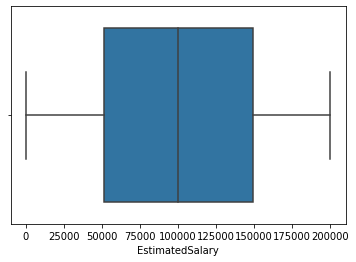

In [12]:
sns.boxplot(df['EstimatedSalary'], data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


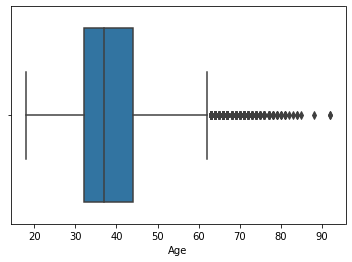

In [13]:
sns.boxplot(df['Age'], data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


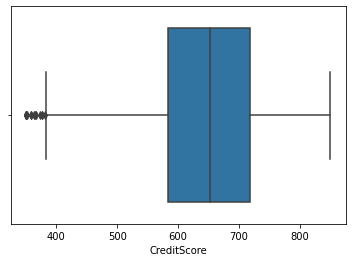

In [14]:
sns.boxplot(df['CreditScore'], data=df)

###  Handling outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


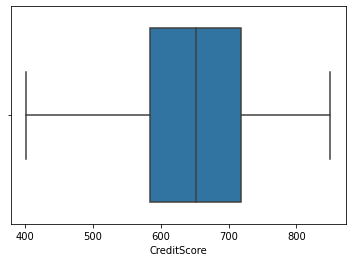

In [15]:
df['CreditScore'] = np.where(df['CreditScore'] < 400, 600, df['CreditScore'])
sns.boxplot(df['CreditScore'], data=df)

## 7. Check for Categorical columns and perform encoding

In [16]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

The columns Geography, Gender, Surname are categorical.

In [17]:
df['Gender']=df['Gender'].astype('category')
df['Gender']=df['Gender'].cat.codes
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df['Geography']=df['Geography'].astype('category')
df['Geography']=df['Geography'].cat.codes
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df['Surname']=df['Surname'].astype('category')
df['Surname']=df['Surname'].cat.codes
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## 8. Split the data into dependent and independent variables

In [20]:
X = df.iloc[:, :13]
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10


In [21]:
Y = df.iloc[:, 13:]
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


## 9. Scale the independent variables

In [22]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

## 10. Split the data into training and testing

In [24]:
X = df.iloc[:, 3:-4 ]
y = df.loc[:, ['Exited']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .7)

In [25]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts
7681,641,0,1,33,2,146193.60,2
9031,541,0,1,39,7,0.00,2
3691,590,0,0,76,5,160979.68,1
202,516,2,1,50,5,0.00,1
5625,508,0,0,60,7,143262.04,1
...,...,...,...,...,...,...,...
9225,594,1,0,32,4,120074.97,2
4859,794,2,0,22,4,114440.24,1
3264,738,0,1,35,5,161274.05,2
9845,590,2,0,38,9,0.00,2


In [26]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts
9394,597,1,0,35,8,131101.04,1
898,523,0,0,40,2,102967.41,1
2398,706,2,0,42,8,95386.82,1
5906,788,0,1,32,4,112079.58,1
2343,706,1,1,38,5,163034.82,2
...,...,...,...,...,...,...,...
4004,530,2,0,41,4,0.00,2
7375,639,0,1,77,6,80926.02,2
9307,685,0,1,40,2,168001.34,2
8394,692,0,1,69,10,154953.94,1


In [27]:
y_train

,Exited
7681,1
9031,0
3691,0
202,1
5625,0
...,...
9225,0
4859,0
3264,0
9845,0


In [28]:
y_test

,Exited
9394,0
898,1
2398,0
5906,0
2343,0
...,...
4004,0
7375,0
9307,0
8394,0
